In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as power
from math import sqrt
%matplotlib inline

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.
Here is the data file. And here is the codebook, with information about the variable coding and content.
In this dataset, the same participants answered questions in 2012 and again 2014.
1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
Submit a link to your work below.

In [3]:
#paired_ttest()

In [61]:
df = pd.read_csv('ESSdata_Thinkful.csv')

In [6]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [67]:
def compare_years(df, attr='ppltrst', country='ES'):
    print('\n\n Computing results for {}.'.format(country))
    data = df[df[attr].notnull()]
    data = data[data.cntry==country]
    yr12 = data[data.year==6]
    yr12.index = yr12.idno
    yr14 = data[data.year==7]
    yr14.index = yr14.idno
    
    #Ensure that all samples occur in both years
    for ind in yr12.index:
        if ind not in yr14.index:
            print('rejecting idno: ', ind)
            yr12.drop([ind], inplace=True)
    for ind in yr14.index:
        if ind not in yr12.index:
            print('rejecting idno: ', ind)
            yr14.drop([ind], inplace=True)
            
    yr12[attr].hist(alpha=.5, label='2012')
    yr14[attr].hist(alpha=.5, label='2014')
    plt.legend();
    plt.title('Trust response distribution for {}'.format(country));
    plt.show();
    
    
    ttest_res = stats.ttest_rel(yr12[attr], yr14[attr])
    print(ttest_res)
    alpha = ttest_res[1]
    pooled_SD = sqrt((yr12[attr].std()+yr14[attr].std())/2)
    effect_size = abs(yr12[attr].mean() - yr14[attr].mean()) / pooled_SD
    print('statistical power: ', power.tt_solve_power(
        effect_size=effect_size, 
        nobs=len(yr12),
        alpha=alpha, 
        power=None, 
        alternative='two-sided'
    ))
    print(stats.kruskal(yr12[attr], yr14[attr]))
    print('mean 2012: ', yr12[attr].mean(), 
          'median 2012: ', yr12[attr].median())
    print('mean 2014: ', yr14[attr].mean(),
         'median 2014: ', yr14[attr].median())
    
    return df

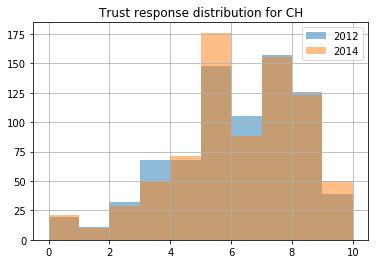

Ttest_relResult(statistic=-0.65868517567257368, pvalue=0.51029435113011345)
statistical power:  0.791164236214
KruskalResult(statistic=0.30163599644480188, pvalue=0.58285861114420479)
mean 2012:  5.67787839586 median 2012:  6.0
mean 2014:  5.75161707633 median 2014:  6.0
rejecting idno:  1314.0
rejecting idno:  1101.0
rejecting idno:  1268.0
rejecting idno:  1308.0
rejecting idno:  1316.0


/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


rejecting idno:  1331.0
rejecting idno:  2097.0
rejecting idno:  2118.0


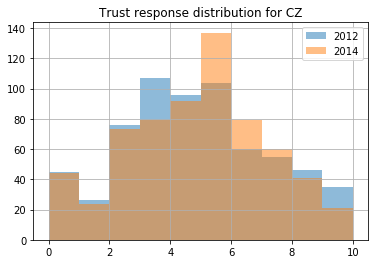

Ttest_relResult(statistic=-0.50016383368872164, pvalue=0.6171292682404208)
statistical power:  0.785978937816
KruskalResult(statistic=0.84362991110276175, pvalue=0.35836067387096793)
mean 2012:  4.36153846154 median 2012:  4.0
mean 2014:  4.42923076923 median 2014:  5.0


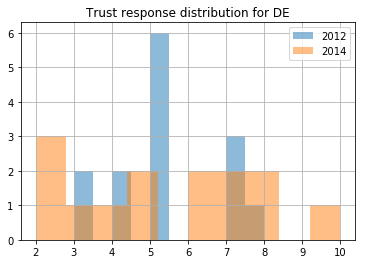

Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.85685637970958051)
statistical power:  0.866474339065
KruskalResult(statistic=0.03493591039585809, pvalue=0.85173001912501989)
mean 2012:  5.21428571429 median 2012:  5.0
mean 2014:  5.35714285714 median 2014:  5.5
rejecting idno:  814.0
rejecting idno:  1921.0


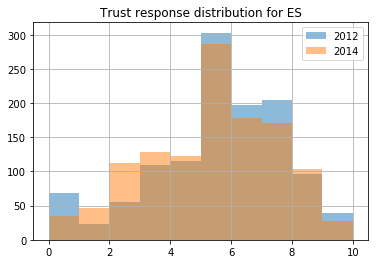

Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725321856)
statistical power:  0.996271213041
KruskalResult(statistic=8.0338873391011916, pvalue=0.0045910202955841972)
mean 2012:  5.11230388109 median 2012:  5.0
mean 2014:  4.89512799339 median 2014:  5.0
rejecting idno:  18678.0
rejecting idno:  10836.0


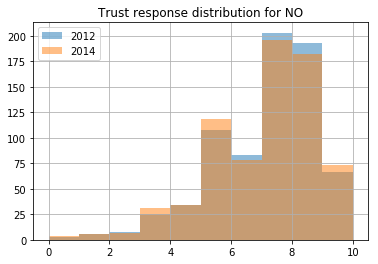

Ttest_relResult(statistic=0.50730770811244041, pvalue=0.61209257015187668)
statistical power:  0.748374279329
KruskalResult(statistic=0.20474991979607021, pvalue=0.65091385915822464)
mean 2012:  6.64746227709 median 2012:  7.0
mean 2014:  6.59945130316 median 2014:  7.0
rejecting idno:  499.0
rejecting idno:  3561.0


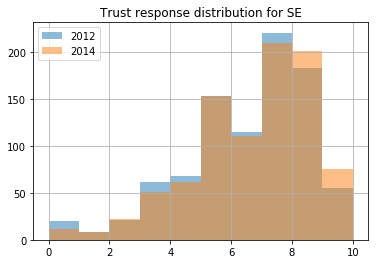

Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.039007816709577599)
statistical power:  0.983296911163
KruskalResult(statistic=4.2143025619225307, pvalue=0.040084541643601604)
mean 2012:  6.05849889625 median 2012:  7.0
mean 2014:  6.25717439294 median 2014:  7.0


In [65]:
countries = list(df.cntry.unique())
for country in countries:
    df = compare_years(df, country = country)

A visual inspection suggests no major changes for each country from year to year, with the exception of DE (but there is no obvious movement in one direction for that particular country.) The only p <. 05 results are spain (ES) and Sweden (SE). We see the mean value in Spain decreased slightly from 5.1 in 2012 to 4.9 in 2014, where in Sweden it increased from 6.05 to 6.25. Both of these changes in mean responses come with a p < .05 and statistical power value > .95, which suggests a very low probability of erroneously rejecting $ H_0 $: that the survey year (2012 vs 2014) has no effect on mean response for these countries.

## Question 2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.

rejecting idno:  715.0
rejecting idno:  789.0
rejecting idno:  2397.0


/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


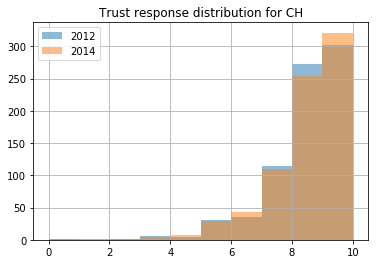

Ttest_relResult(statistic=-0.31941295786223201, pvalue=0.7495001355428359)
statistical power:  0.782875588916
KruskalResult(statistic=0.1553248854077178, pvalue=0.69349777405218627)
mean 2012:  8.08831168831 median 2012:  8.0
mean 2014:  8.11168831169 median 2014:  8.0
rejecting idno:  1036.0
rejecting idno:  1040.0
rejecting idno:  1109.0
rejecting idno:  1164.0
rejecting idno:  1266.0
rejecting idno:  1387.0


/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


rejecting idno:  1039.0
rejecting idno:  1058.0
rejecting idno:  1066.0
rejecting idno:  1149.0
rejecting idno:  1177.0
rejecting idno:  1243.0
rejecting idno:  1246.0
rejecting idno:  1289.0
rejecting idno:  1386.0
rejecting idno:  1388.0
rejecting idno:  1472.0
rejecting idno:  2119.0


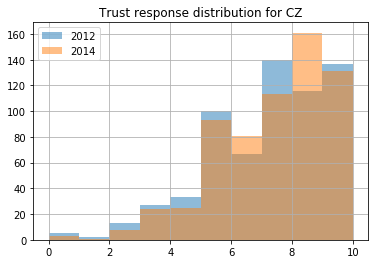

Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.14584548433894534)
statistical power:  0.928585742568
KruskalResult(statistic=1.8541158661947039, pvalue=0.17330545259186408)
mean 2012:  6.7671875 median 2012:  7.0
mean 2014:  6.9296875 median 2014:  7.0


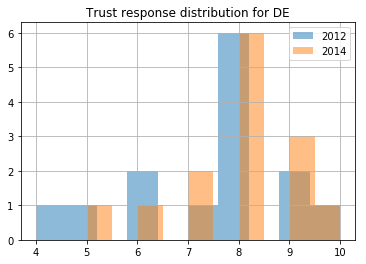

Ttest_relResult(statistic=-0.80622577482985491, pvalue=0.43461387077349911)
statistical power:  0.718509840857
KruskalResult(statistic=0.39056749122656015, pvalue=0.53200125505866203)
mean 2012:  7.42857142857 median 2012:  8.0
mean 2014:  7.85714285714 median 2014:  8.0
rejecting idno:  885.0
rejecting idno:  1210.0


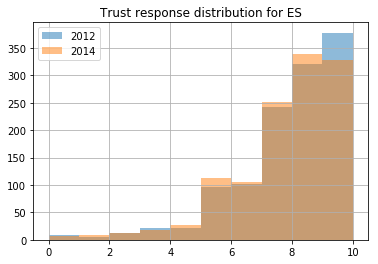

Ttest_relResult(statistic=1.613832417735418, pvalue=0.1068245155648069)
statistical power:  0.945407897058
KruskalResult(statistic=3.9620118510103475, pvalue=0.046538051258145516)
mean 2012:  7.54748142031 median 2012:  8.0
mean 2014:  7.42031379026 median 2014:  8.0
rejecting idno:  9846.0
rejecting idno:  10836.0
rejecting idno:  14862.0
rejecting idno:  20076.0


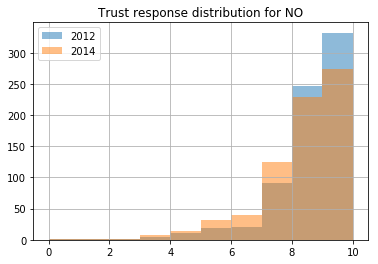

Ttest_relResult(statistic=4.2856826576235925, pvalue=2.0674530134057013e-05)
statistical power:  0.99922838645
KruskalResult(statistic=19.516976798583492, pvalue=9.9709577896719241e-06)
mean 2012:  8.25171939477 median 2012:  8.0
mean 2014:  7.91196698762 median 2014:  8.0
rejecting idno:  165.0
rejecting idno:  252.0
rejecting idno:  787.0
rejecting idno:  1494.0


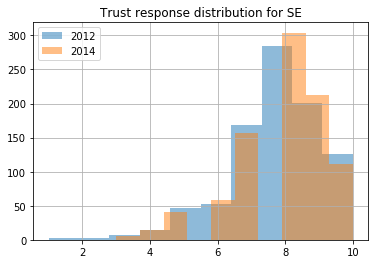

Ttest_relResult(statistic=-0.55816370860300124, pvalue=0.57687095912341613)
statistical power:  0.721076683143
KruskalResult(statistic=0.039421145398400935, pvalue=0.84261665454706791)
mean 2012:  7.9092920354 median 2012:  8.0
mean 2014:  7.94800884956 median 2014:  8.0


In [66]:
for country in countries:
    df = compare_years(df, country = country, attr = 'happy')

The only response with highly significant differences between the two years in Norway (NO), whose mean response decreased from 8.25 in 2012 to 7.9 in 2014. This change in mean comes with a small p value and a high statistical power, suggesting a very high likelihood for correctly rejecting $ H_0 $: that there is no effect between 2012 and 2014 on the response distribution.

## Question 3: Who reported watching more TV in 2012, men or women?

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


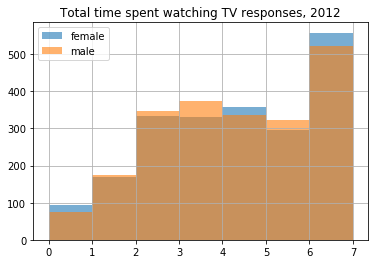

Ttest_indResult(statistic=0.68999281092095022, pvalue=0.49023604026969858)
statistical power:  0.776162132091
KruskalResult(statistic=0.57660910205494509, pvalue=0.44764452250079501)
mean female response:  3.94439252336 median female response:  4.0
mean male response:  3.90190609019 median male response:  4.0


In [7]:
#Get all 2012 responses w/ tvtot
data12 = df[df.year==6][df.tvtot.notnull()]

#assign into male/female groups
f12 = data12[data12.gndr==2]
m12 = data12[data12.gndr==1]

f12.tvtot.hist(alpha=.6, label='female', bins=7)
m12.tvtot.hist(alpha=.6, label='male', bins=7)
plt.title('Total time spent watching TV responses, 2012')
plt.legend();
plt.show();

ttest_res = stats.ttest_ind(f12.tvtot, m12.tvtot)
print(ttest_res)
alpha = ttest_res[1]
pooled_SD = sqrt((f12.tvtot.std()+m12.tvtot.std())/2)
effect_size = abs(f12.tvtot.mean() - m12.tvtot.mean()) / pooled_SD
print('statistical power: ', power.tt_solve_power(effect_size=effect_size, nobs=len(m12), alpha=alpha, power=None, alternative='two-sided'))

print(stats.kruskal(f12.tvtot, m12.tvtot))
print('mean female response: ', f12.tvtot.mean(), 
      'median female response: ', f12.tvtot.median())
print('mean male response: ', m12.tvtot.mean(),
     'median male response: ', m12.tvtot.median())

Neither a t-test nor the Kruskal-Wallis test detect a significant difference between the two groups, and a visual inspection of the response distributions between the male and female groups seems to agree: there's no visible difference between the two distributions. We can confidently accept $ H_0 $, that sex has no impact on time spent watching TV responses.

## Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


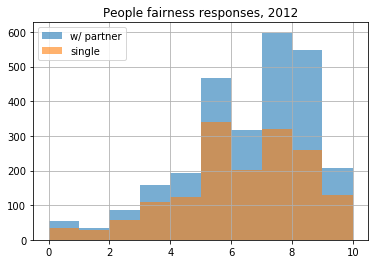

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.00090739526098837563)
statistical power:  0.997493885062
KruskalResult(statistic=13.739649374653519, pvalue=0.00020997468964373384)
mean single response:  5.85696517413 median single response:  6.0
mean partnered response:  6.08073601202 median partnered response:  7.0


In [8]:
#Get all 2012 responses w/ fairness response
data12 = df[df.year==6][df.pplfair.notnull()]

#assign into single/partner groups
p12 = data12[data12.partner==1]
s12 = data12[data12.partner==2]

p12.pplfair.hist(alpha=.6, label='w/ partner', bins=10)
s12.pplfair.hist(alpha=.6, label='single', bins=10)
plt.title('People fairness responses, 2012')
plt.legend();
plt.show();

ttest_res = stats.ttest_ind(p12.pplfair, s12.pplfair)
print(ttest_res)
alpha = ttest_res[1]
pooled_SD = sqrt((p12.pplfair.std()+s12.pplfair.std())/2)
effect_size = abs(p12.pplfair.mean() - s12.pplfair.mean()) / pooled_SD
print('statistical power: ', power.tt_solve_power(effect_size=effect_size, nobs=len(s12), alpha=alpha, power=None, alternative='two-sided'))


print(stats.kruskal(p12.pplfair, s12.pplfair))
print('mean single response: ', s12.pplfair.mean(), 
      'median single response: ', s12.pplfair.median())
print('mean partnered response: ', p12.pplfair.mean(),
     'median partnered response: ', p12.pplfair.median()) 

It looks like there's a strong tendency for people living with a partner to respond higher to the question, "do you think that most people would try to take advantage of you if they got the chance, or would they try to be fair? (1-10)," supported by a higher mean and higher median response in the partnered group, a low p value in both a t-test and a Kruskal-Wallis test between the two distributions. This could appear to agree with my expectation that more trusting people are more willing/likely to live with a partner. However, it's only enough to reject $ H_0 $: that living alone or living with a partner has no effect on response to the question.

In [9]:
df.partner.value_counts()

1.0    5276
2.0    3301
Name: partner, dtype: int64

## Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

I want to pick the countries with the most avialable samples for more play. Let's see.

In [118]:
def anova_groups(df, groups, attr='sclmeet'):
    lists = []
    for group in groups:
        lists.append(df[df.cntry == group].sclmeet)
        print('\nThe mean value for {} is: '.format(group), lists[-1].mean())
        print('The median value for {} is: '.format(group), lists[-1].median())
        #return
    print('\n')
    print('Including all groups:')
    print(stats.f_oneway(*lists))
    print(stats.kruskal(*lists))
    for i, group in enumerate(groups):
        print('\nexcluding group: ', group)
        new_list = lists[:i] + lists[(i+1):]
        print(stats.f_oneway(*new_list))
        print(stats.kruskal(*new_list))
    return None

In [120]:
data14 = df[df.year==7][df.sclmeet.notnull()]
data14.cntry.value_counts()

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


ES    1211
SE     908
CH     772
NO     731
CZ     655
DE      14
Name: cntry, dtype: int64

In [122]:
sel_countries = ['ES', 'SE', 'CH', 'NO']
anova_groups(data14, sel_countries)


The mean value for ES is:  5.26011560694
The median value for ES is:  6.0

The mean value for SE is:  5.42621145374
The median value for SE is:  6.0

The mean value for CH is:  5.16062176166
The median value for CH is:  6.0

The mean value for NO is:  5.3023255814
The median value for NO is:  6.0


Including all groups:
F_onewayResult(statistic=5.3617236593518438, pvalue=0.001106621438920195)
KruskalResult(statistic=21.186241353532942, pvalue=9.6304263259085977e-05)

excluding group:  ES
F_onewayResult(statistic=8.1348205491906338, pvalue=0.00030128247695001382)
KruskalResult(statistic=21.708596810002788, pvalue=1.9321378032271685e-05)

excluding group:  SE
F_onewayResult(statistic=2.1071395397327897, pvalue=0.12178434658137968)
KruskalResult(statistic=7.7293619444946691, pvalue=0.020969611257989122)

excluding group:  CH
F_onewayResult(statistic=3.726110434690217, pvalue=0.024203881861066479)
KruskalResult(statistic=6.9040385192298057, pvalue=0.031681598373018129)

excluding group:  

Based on these results and my criteria, it looks like Spain (ES), Sweden (SE), Switzerland (CH), and Norway (NO) are the best four to choose from.

There appears to be a notable effect on the response for the social gathering question. With respect to statistical power, it looks like Sweden's higher mean response (5.4) is notably different (greater) than the aggregate responses of the other countries, with both high statistical power and low p value associated with its t-test. For Sweden, we can reject $ H_0 $ with high confidence.

## Question 6: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out? Submit a link to your work below.

In [12]:
# I'll pick the same set of countries as before for the same reason: big samples.
data14 = df[df.year==7][df.sclact.notnull()]
data14.cntry.value_counts()

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


ES    1185
SE     904
CH     765
NO     731
CZ     650
DE      14
Name: cntry, dtype: int64

In [123]:
anova_groups(data14, sel_countries, attr='aclact')


The mean value for ES is:  5.26011560694
The median value for ES is:  6.0

The mean value for SE is:  5.42621145374
The median value for SE is:  6.0

The mean value for CH is:  5.16062176166
The median value for CH is:  6.0

The mean value for NO is:  5.3023255814
The median value for NO is:  6.0


Including all groups:
F_onewayResult(statistic=5.3617236593518438, pvalue=0.001106621438920195)
KruskalResult(statistic=21.186241353532942, pvalue=9.6304263259085977e-05)

excluding group:  ES
F_onewayResult(statistic=8.1348205491906338, pvalue=0.00030128247695001382)
KruskalResult(statistic=21.708596810002788, pvalue=1.9321378032271685e-05)

excluding group:  SE
F_onewayResult(statistic=2.1071395397327897, pvalue=0.12178434658137968)
KruskalResult(statistic=7.7293619444946691, pvalue=0.020969611257989122)

excluding group:  CH
F_onewayResult(statistic=3.726110434690217, pvalue=0.024203881861066479)
KruskalResult(statistic=6.9040385192298057, pvalue=0.031681598373018129)

excluding group:  

Although there are some notable differences, it's important to point out the low statistical power of the t-tests I perform between each country's individual distribution and the total distribution of responses (across all countries.) This suggests that, while there may be some "significant" differences in the responses, there's not enough statistical power to confidently reject the null hypothesis, that country has no effect on response to this question. The greatest power comes from looking at Spain (ES), which still leaves an unsatisfactorily-high chance for erroneously rejecting $ H_0 $.